In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)
import pandas as pd

from utils_hyperelasticity import NODE_vmap as NODE


In [6]:
data = 'brain_BG'
with open('saved/' + data + '_RG_params.npy', 'rb') as f:
    RG_params = pickle.load(f)
RG_Phi_params = RG_params[-1]
eta_D, eta_V = np.exp(RG_Phi_params[0]), np.exp(RG_Phi_params[1])

with open('saved/' + data + '_params_retrained.npy', 'rb') as f:
    params = pickle.load(f)
Phi_params = params[-1]
NODE3_params, NODE4_params, NODE5_params = Phi_params

with open('saved/' + data + '_Phi_norm_w.npy', 'rb') as f:
    Phi_norm = pickle.load(f)
inp_stds, out_stds = Phi_norm
inp_std3, inp_std4, inp_std5 = inp_stds
out_std3, out_std4, out_std5 = out_stds


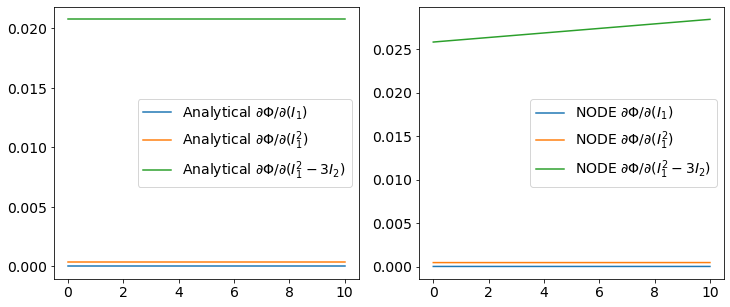

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

# RG
x = np.linspace(0,10)
y1 = np.zeros_like(x)
y2 = np.ones_like(x)*1/9/eta_V
y3 = np.ones_like(x)*1/3/eta_D
ax[0].plot(x, y1, label='Analytical $\partial \Phi / \partial (I_1)$')
ax[0].plot(x, y2, label='Analytical $\partial \Phi / \partial (I_1^2)$')
ax[0].plot(x, y3, label='Analytical $\partial \Phi / \partial (I_1^2-3I_2)$')
ax[0].legend()

# NODE
N3 = NODE(x/inp_std3, NODE3_params)*out_std3
N4 = NODE(x/inp_std4, NODE4_params)*out_std4 #I1^2
N5 = NODE(x/inp_std5, NODE5_params)*out_std5 #I1^2 - 3I2

ax[1].plot(x, N3, label='NODE $\partial \Phi / \partial (I_1)$')
ax[1].plot(x, N4, label='NODE $\partial \Phi / \partial (I_1^2)$')
ax[1].plot(x, N5, label='NODE $\partial \Phi / \partial (I_1^2-3I_2)$')

ax[1].legend()